# Análise Exploratória dos Dados

## Setup

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from shutil import copy2

# Matplotlib options
rcParams['figure.figsize'] = (10, 8)
rcParams['axes.grid'] = False

# Pandas setup
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000) 
pd.set_option('display.max_colwidth', -1) 

In [2]:
# Read file
path = "./Entities/"
name = "p1"
filename = name + ".csv"
df = pd.read_csv(path + filename, encoding='utf8')

# Transformations
df["DATA"] =  pd.to_datetime(df["DATA"], format="%Y-%m-%d")
df.drop(columns=["ENTIDADE"], inplace=True)

# Select max value in month interval
period = df.DATA.dt.to_period("M")
tidy = df.groupby(period).max()
tidy.index = tidy.index.rename("DATE")
tidy.drop(columns="DATA", inplace=True)
df = tidy

## EDA

### Verificar Informações do Dataset

In [3]:
print(
    f"\033[31mLinhas: {df.shape[0]}\n"
    f"Colunas: {df.shape[1]}\n"
    f"\033[32mFeatures: {df.columns.tolist()}\n"
    f"\033[34mValores ÚNICOS: \n{df.nunique()}\n"
    f"\033[36mValores FALTANTES: \n{df.isnull().sum()}\033[0"
)

Linhas: 88
Colunas: 39
Features: ['SURFACTANTES', 'PH', 'FÓSFORO', 'ALUMÍNIO', 'ARSÊNIO', 'BÁRIO', 'BORO', 'CÁDMIO', 'CHUMBO', 'CIANETO', 'COBALTO', 'COBRE', 'CROMO', 'CROMO_HEXAVALENTE', 'DBO', 'DQO', 'ESTANHO', 'FERRO', 'FLUORETO', 'LÍTIO', 'MANGANÊS', 'MERCÚRIO', 'MOLIBDÊNIO', 'NÍQUEL', 'NITROGÊNIO_AMONIACAL', 'NITROGÊNIO_KJELDAHL', 'COLIFORMES_TERMOTOLERANTES', 'PRATA', 'ÍNDICE_DE_FENÓIS', 'NITROGÊNIO', 'FENOL', 'ALCALINIDADE', 'UMIDADE', 'PORCENTAGEM_SÓLIDOS', 'COMPOSTOS', 'COR_VERDADEIRA', 'SÓLIDOS', 'ÓLEOS', 'ACIDEZ']
Valores ÚNICOS: 
SURFACTANTES                  63
PH                            13
FÓSFORO                       66
ALUMÍNIO                      30
ARSÊNIO                       6 
BÁRIO                         25
BORO                          17
CÁDMIO                        4 
CHUMBO                        7 
CIANETO                       6 
COBALTO                       4 
COBRE                         24
CROMO                         12
CROMO_HEXAVALENTE      

### Selecionar features com no máximo 25% de valores NULOS

In [11]:
aux = pd.DataFrame(df.isnull().sum() / df.shape[0], columns=["NULL_COUNT"])
threshold = 0.75
features = aux[aux["NULL_COUNT"] < threshold].index.tolist()
print(f"Redução de {df.shape[1] - df[features].shape[1]} features.")
df = df[features]

Redução de 14 features.


### Comparar Séries Históricas

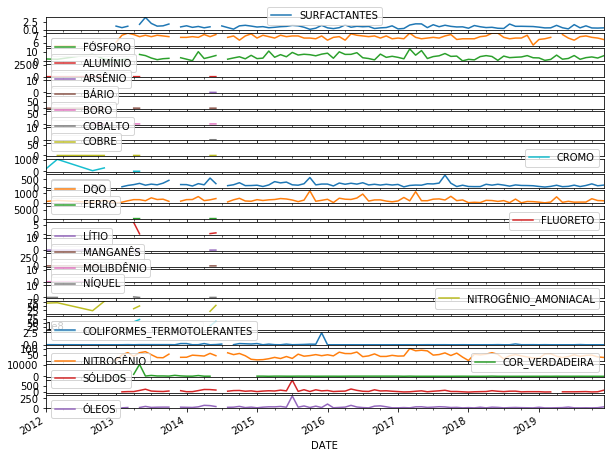

In [12]:
# df = df.set_index("DATA")
df.plot(subplots=True);

## Verificando a Distribuição dos Valores

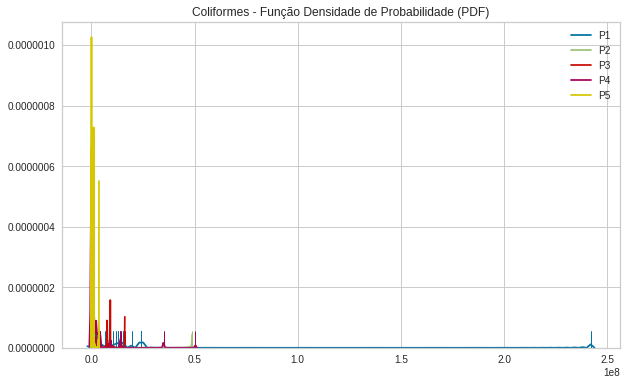

In [30]:
entity_names = df.ENTIDADE.unique().tolist()
entities = [df.loc[df['ENTIDADE'] == entity_name] for entity_name in entity_names]

for entity in entities:
    sns.distplot(entity[[name]].dropna(), hist=False, rug=True, label=str(entity['ENTIDADE'].unique()[0]))
plt.title(f"{name.capitalize()} - Função Densidade de Probabilidade (PDF)");

## Série Histórica

<Figure size 1080x576 with 0 Axes>

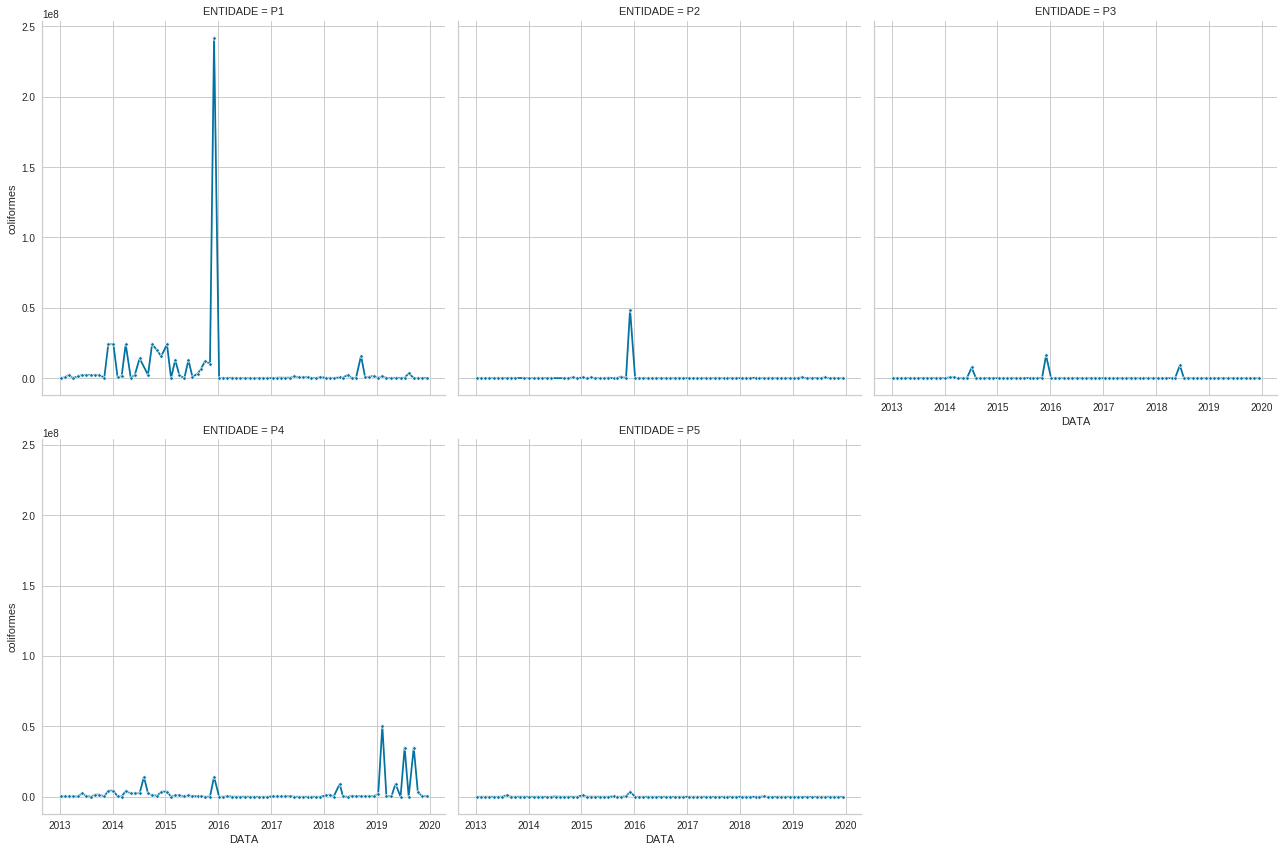

In [31]:
plt.figure(figsize=(15, 8))
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=6, dropna=True)
g = g.map(sns.lineplot, "DATA", name, marker=".", palette="Set2")
plt.show();
# for ax in g.axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(90)

## Localizando outliers

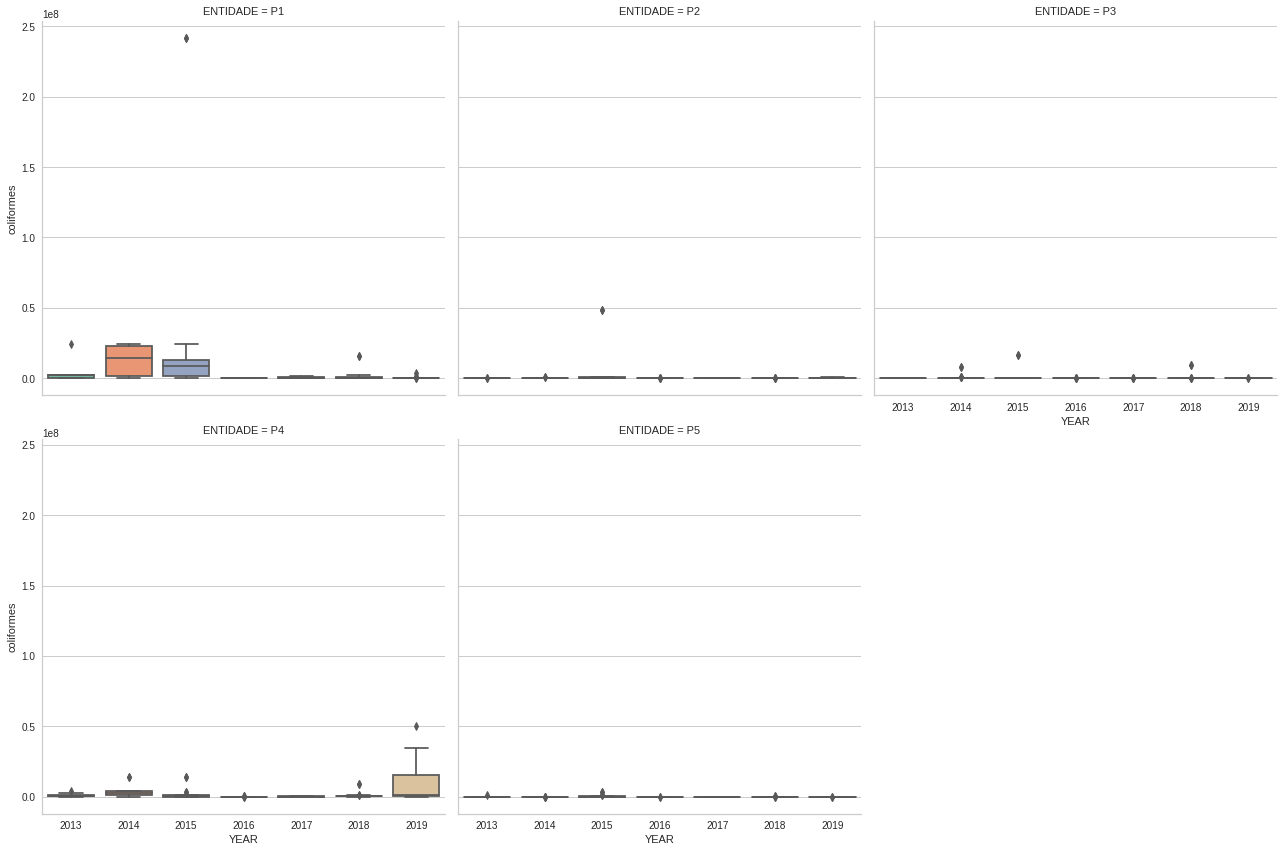

In [32]:
g = sns.FacetGrid(data=df, col="ENTIDADE", col_wrap=3, height=6, dropna=True);
g = g.map(sns.boxplot, "YEAR", name, palette="Set2")

In [14]:
df.drop(columns=["YEAR"], inplace=True)
df.to_csv(f"./Normalized/{name}.csv", encoding='utf8', index=False)
# copy2("EDA.ipynb", f"./EDA/EDA_{name}.ipynb")